<a href="https://colab.research.google.com/github/CarlosSantos99/Curso_Python/blob/main/Python_for_finance_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazilian stock exchange.

## Part 00 - Data Importing.

In [135]:
!pip install yfinance

In [136]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
stocks = ['EMBR3.SA', 'ABEV', 'WEGE3.SA', 'BBAS3.SA', ' PETR4.SA', 'BOVA11.SA', 'RAIL3.SA']

In [139]:
br_stocks = pd.DataFrame()
for stock in stocks:
  br_stocks[stock] = yf.download(stock, start='2018-01-01', end='2024-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Part 01 - Processing, analysis and visualization.

In [140]:
br_stocks

,EMBR3.SA,ABEV,WEGE3.SA,BBAS3.SA,PETR4.SA,BOVA11.SA,RAIL3.SA
Date,,,,,,,
2018-01-02,20.520000,6.61,9.623076,16.465000,16.549999,75.099998,12.990000
2018-01-03,21.299999,6.65,9.476923,16.674999,16.700001,75.300003,12.600000
2018-01-04,21.799999,6.64,9.384615,16.834999,16.730000,76.000000,12.620000
2018-01-05,20.650000,6.67,9.423076,16.834999,16.830000,76.440002,12.600000
2018-01-08,20.700001,6.62,9.500000,16.875000,17.030001,76.760002,12.760000
...,...,...,...,...,...,...,...
2023-12-21,22.629999,2.92,36.389999,27.145000,36.389999,128.350006,22.820000
2023-12-22,22.740000,2.81,36.509998,27.219999,36.740002,128.940002,22.900000
2023-12-26,22.520000,2.83,36.720001,27.469999,37.330002,129.649994,22.910000


In [141]:
br_stocks.isnull().sum()

,0
EMBR3.SA,0
ABEV,38
WEGE3.SA,0
BBAS3.SA,0
PETR4.SA,0
BOVA11.SA,18
RAIL3.SA,0


In [142]:
br_stocks.dropna(inplace=True)
br_stocks.shape

(1432, 7)

In [143]:
br_stocks = br_stocks.rename(columns={'EMBR3.SA':'EMBRAER', 'ABEV':'AMBEV', 'WEGE3.SA':'WEGE', 'BBAS3.SA':'BANCO DO BRASIL', ' PETR4.SA':'PETROBRAS', 'BOVA11.SA':'BOVA', 'RAIL3.SA':'RUMO'})

In [144]:
br_stocks.to_csv('br_stocks.csv')

In [145]:
new_br_stocks = pd.read_csv('br_stocks.csv')
new_br_stocks

,Date,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,2018-01-02,20.520000,6.61,9.623076,16.465000,16.549999,75.099998,12.990000
1,2018-01-03,21.299999,6.65,9.476923,16.674999,16.700001,75.300003,12.600000
2,2018-01-04,21.799999,6.64,9.384615,16.834999,16.730000,76.000000,12.620000
3,2018-01-05,20.650000,6.67,9.423076,16.834999,16.830000,76.440002,12.600000
4,2018-01-08,20.700001,6.62,9.500000,16.875000,17.030001,76.760002,12.760000
...,...,...,...,...,...,...,...,...
1427,2023-12-21,22.629999,2.92,36.389999,27.145000,36.389999,128.350006,22.820000
1428,2023-12-22,22.740000,2.81,36.509998,27.219999,36.740002,128.940002,22.900000
1429,2023-12-26,22.520000,2.83,36.720001,27.469999,37.330002,129.649994,22.910000
1430,2023-12-27,22.660000,2.84,36.840000,27.430000,37.360001,130.229996,23.000000


In [146]:
new_br_stocks.describe()

,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
count,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000,1432.000000
mean,16.752926,3.559721,25.792937,19.366491,26.311571,100.048408,19.183743
std,4.779377,1.178135,12.164906,3.929988,4.938556,13.850719,3.129557
min,6.030000,1.940000,7.605000,11.065000,11.290000,61.139999,12.320000
25%,13.550000,2.740000,11.285000,16.132500,22.965000,91.949997,17.107501
50%,18.219999,3.000000,30.595000,18.275001,26.695001,101.905003,19.299999
75%,19.902500,4.450000,36.389999,23.257499,29.522501,110.699997,21.702500
max,26.049999,7.390000,45.139999,27.695000,38.520000,130.389999,26.870001


In [147]:
len(new_br_stocks.columns)

8

In [148]:
np.arange(1, len(new_br_stocks.columns))

array([1, 2, 3, 4, 5, 6, 7])

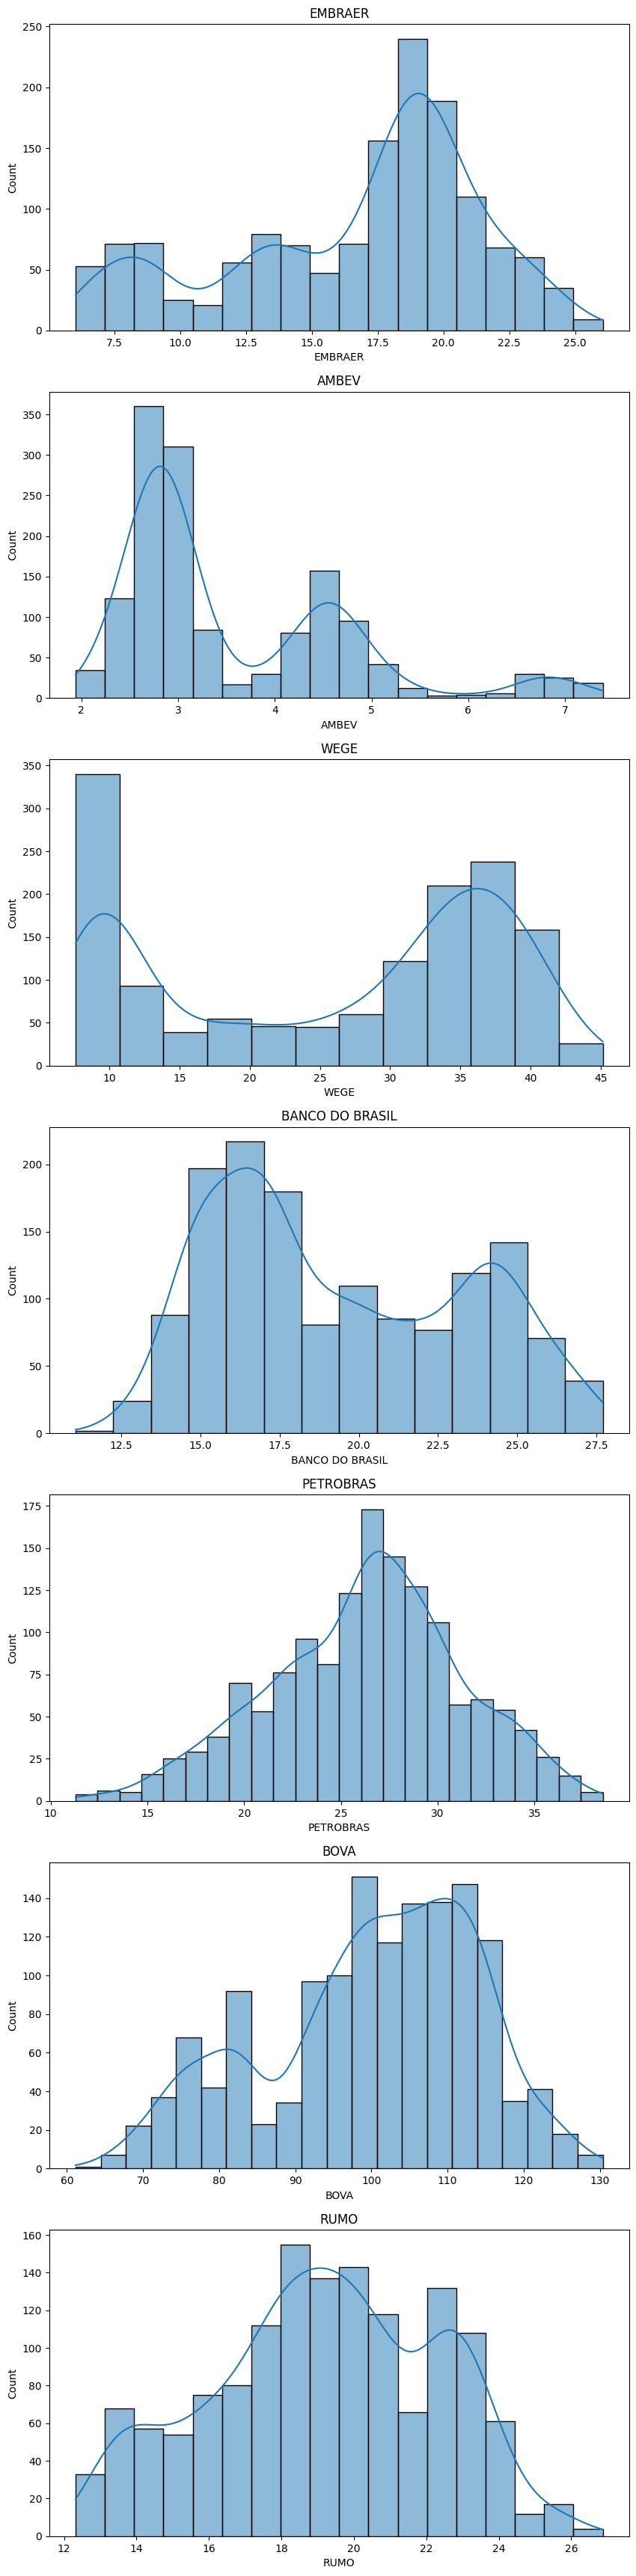

In [149]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(new_br_stocks.columns)):
  plt.subplot(8, 1, i + 1)
  sns.histplot(br_stocks[new_br_stocks.columns[i]], kde = True)
  plt.title(new_br_stocks.columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed 

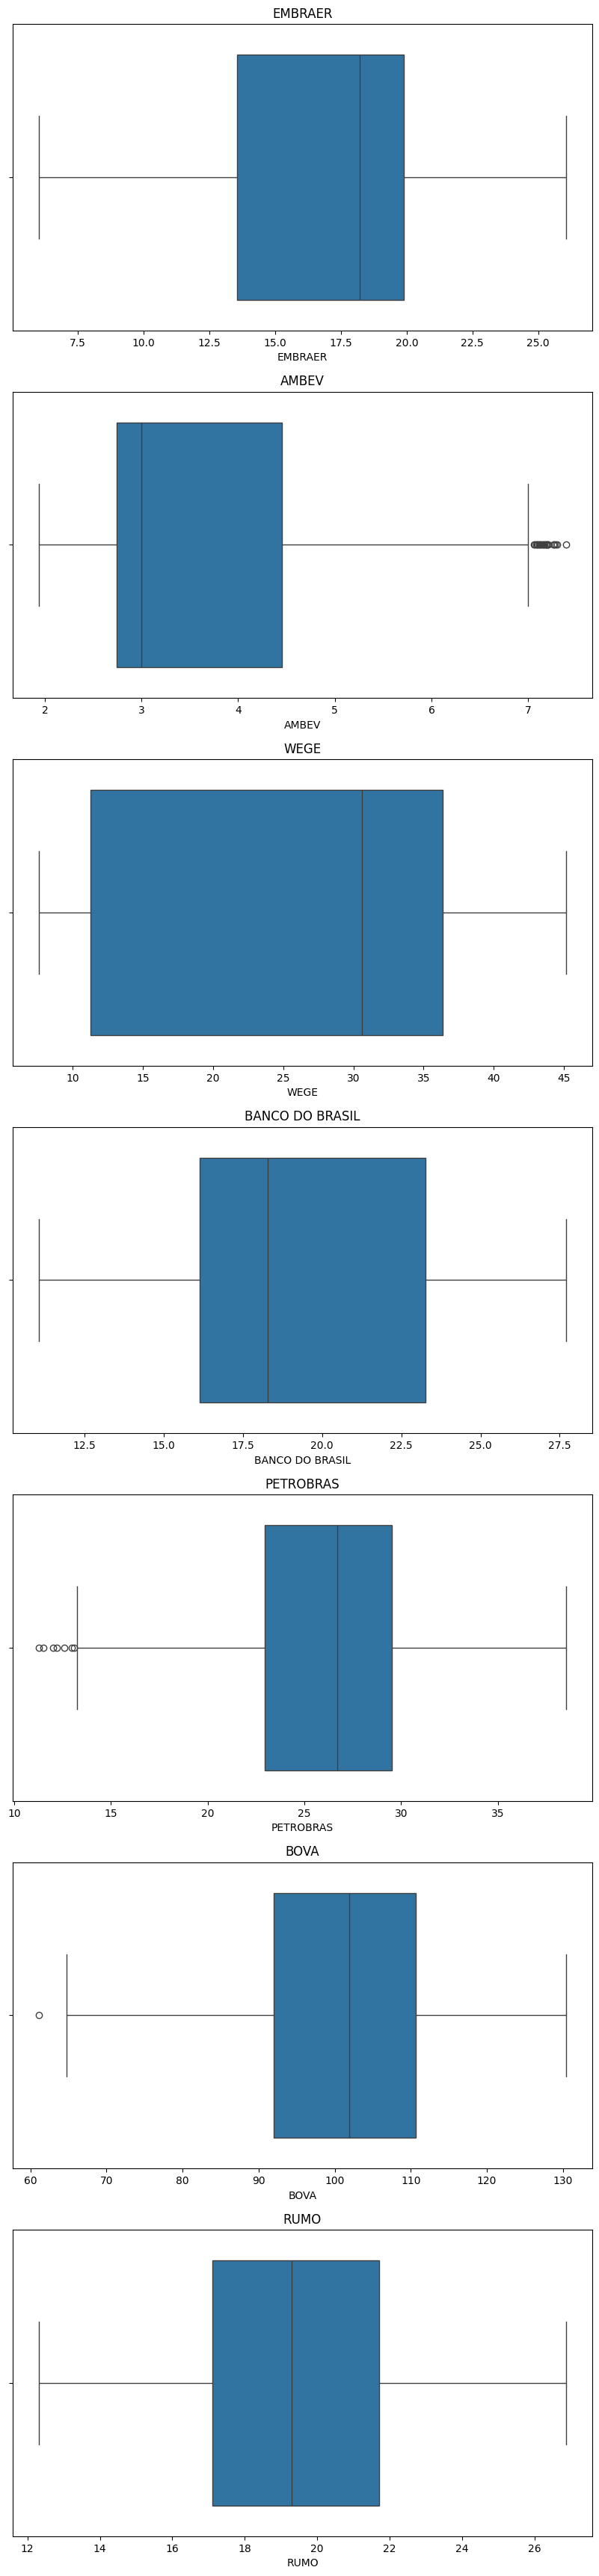

In [150]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(new_br_stocks.columns)):
  plt.subplot(8, 1, i + 1)
  sns.boxplot(x = br_stocks[new_br_stocks.columns[i]])
  plt.title(new_br_stocks.columns[i])

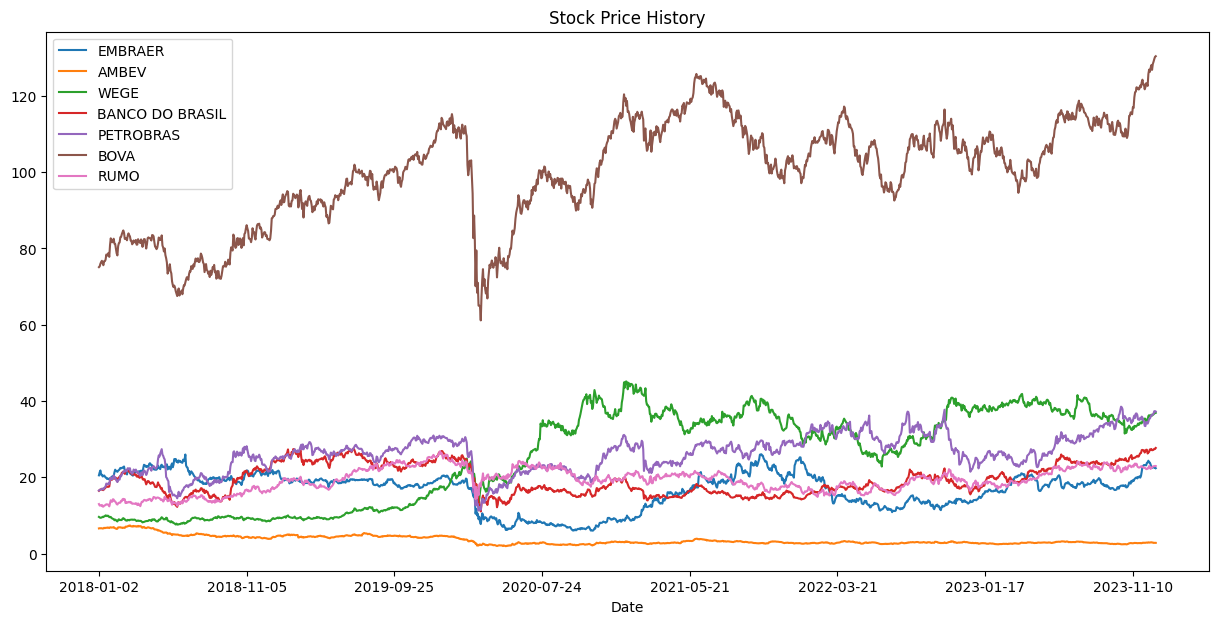

In [151]:
new_br_stocks.plot(x = 'Date', figsize = (15,7), title = 'Stock Price History');

In [152]:
fig = px.line(title = 'Stock Price History')
for i in new_br_stocks.columns[1:]:
 fig.add_scatter(x = new_br_stocks['Date'], y = new_br_stocks[i], name = i)
fig.show()

In [153]:
br_stocks_formated = new_br_stocks.copy()
for i in br_stocks_formated.columns[1:]:
  br_stocks_formated[i] = br_stocks_formated[i] / br_stocks_formated[i][0]

In [154]:
br_stocks_formated

,Date,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-03,1.038012,1.006051,0.984812,1.012754,1.009064,1.002663,0.969977
2,2018-01-04,1.062378,1.004539,0.975220,1.022472,1.010876,1.011984,0.971517
3,2018-01-05,1.006335,1.009077,0.979217,1.022472,1.016918,1.017843,0.969977
4,2018-01-08,1.008772,1.001513,0.987210,1.024901,1.029003,1.022104,0.982294
...,...,...,...,...,...,...,...,...
1427,2023-12-21,1.102826,0.441755,3.781535,1.648649,2.198792,1.709055,1.756736
1428,2023-12-22,1.108187,0.425113,3.794005,1.653204,2.219940,1.716911,1.762895
1429,2023-12-26,1.097466,0.428139,3.815828,1.668387,2.255589,1.726365,1.763664
1430,2023-12-27,1.104288,0.429652,3.828298,1.665958,2.257402,1.734088,1.770593


In [155]:
fig = px.line(title = 'Stock Price History - Formated')
for i in br_stocks_formated.columns[1:]:
 fig.add_scatter(x = br_stocks_formated['Date'], y = br_stocks_formated[i], name = i)
fig.show()

## Part 02 - Rate of return and stock portfolio.

In [156]:
br_stocks_formated.drop(labels=['Date'], axis=1, inplace=True)

In [157]:
br_stocks_return = (br_stocks_formated / br_stocks_formated.shift(1)) - 1
br_stocks_return.head()

,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.038012,0.006051,-0.015188,0.012754,0.009064,0.002663,-0.030023
2,0.023474,-0.001504,-0.009740,0.009595,0.001796,0.009296,0.001587
3,-0.052752,0.004518,0.004098,0.000000,0.005977,0.005790,-0.001585
4,0.002421,-0.007496,0.008163,0.002376,0.011884,0.004186,0.012698


In [158]:
br_stocks_year = br_stocks_return.mean() * 246
br_stocks_year

,0
EMBRAER,0.135412
AMBEV,-0.070866
WEGE,0.299744
BANCO DO BRASIL,0.166172
PETROBRAS,0.252571
BOVA,0.128993
RUMO,0.170091


In [159]:
br_stocks_year = br_stocks_year *100
br_stocks_year

,0
EMBRAER,13.541201
AMBEV,-7.086593
WEGE,29.974404
BANCO DO BRASIL,16.617230
PETROBRAS,25.257139
BOVA,12.899291
RUMO,17.009111


In [160]:
br_stocks_return_porcentage = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
np.dot(br_stocks_year, br_stocks_return_porcentage)

21.642356245880997

In [161]:
br_stocks_formated = new_br_stocks.copy()
for i in br_stocks_formated.columns[1:]:
  br_stocks_formated[i] = br_stocks_formated[i] / br_stocks_formated[i][0]

In [162]:
br_stocks_formated

,Date,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-03,1.038012,1.006051,0.984812,1.012754,1.009064,1.002663,0.969977
2,2018-01-04,1.062378,1.004539,0.975220,1.022472,1.010876,1.011984,0.971517
3,2018-01-05,1.006335,1.009077,0.979217,1.022472,1.016918,1.017843,0.969977
4,2018-01-08,1.008772,1.001513,0.987210,1.024901,1.029003,1.022104,0.982294
...,...,...,...,...,...,...,...,...
1427,2023-12-21,1.102826,0.441755,3.781535,1.648649,2.198792,1.709055,1.756736
1428,2023-12-22,1.108187,0.425113,3.794005,1.653204,2.219940,1.716911,1.762895
1429,2023-12-26,1.097466,0.428139,3.815828,1.668387,2.255589,1.726365,1.763664
1430,2023-12-27,1.104288,0.429652,3.828298,1.665958,2.257402,1.734088,1.770593


In [163]:
br_stocks_formated['STOCKS'] = (br_stocks_formated['EMBRAER'] + br_stocks_formated['AMBEV'] + br_stocks_formated['WEGE'] + br_stocks_formated['BANCO DO BRASIL'] + br_stocks_formated['PETROBRAS'] + br_stocks_formated['BOVA'] + br_stocks_formated['RUMO']) / 7
br_stocks_formated

,Date,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO,STOCKS
0,2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-03,1.038012,1.006051,0.984812,1.012754,1.009064,1.002663,0.969977,1.003333
2,2018-01-04,1.062378,1.004539,0.975220,1.022472,1.010876,1.011984,0.971517,1.008426
3,2018-01-05,1.006335,1.009077,0.979217,1.022472,1.016918,1.017843,0.969977,1.003120
4,2018-01-08,1.008772,1.001513,0.987210,1.024901,1.029003,1.022104,0.982294,1.007971
...,...,...,...,...,...,...,...,...,...
1427,2023-12-21,1.102826,0.441755,3.781535,1.648649,2.198792,1.709055,1.756736,1.805621
1428,2023-12-22,1.108187,0.425113,3.794005,1.653204,2.219940,1.716911,1.762895,1.811465
1429,2023-12-26,1.097466,0.428139,3.815828,1.668387,2.255589,1.726365,1.763664,1.822206
1430,2023-12-27,1.104288,0.429652,3.828298,1.665958,2.257402,1.734088,1.770593,1.827183


In [164]:
fig = px.line(title = 'Stock Price History - Formated')
for i in br_stocks_formated.columns[1:]:
 fig.add_scatter(x = br_stocks_formated['Date'], y = br_stocks_formated[i], name = i)
fig.show()

## Part 03 - return tax and return risk.

In [165]:
x_br_stocks = pd.read_csv('br_stocks.csv')
x_br_stocks

,Date,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,2018-01-02,20.520000,6.61,9.623076,16.465000,16.549999,75.099998,12.990000
1,2018-01-03,21.299999,6.65,9.476923,16.674999,16.700001,75.300003,12.600000
2,2018-01-04,21.799999,6.64,9.384615,16.834999,16.730000,76.000000,12.620000
3,2018-01-05,20.650000,6.67,9.423076,16.834999,16.830000,76.440002,12.600000
4,2018-01-08,20.700001,6.62,9.500000,16.875000,17.030001,76.760002,12.760000
...,...,...,...,...,...,...,...,...
1427,2023-12-21,22.629999,2.92,36.389999,27.145000,36.389999,128.350006,22.820000
1428,2023-12-22,22.740000,2.81,36.509998,27.219999,36.740002,128.940002,22.900000
1429,2023-12-26,22.520000,2.83,36.720001,27.469999,37.330002,129.649994,22.910000
1430,2023-12-27,22.660000,2.84,36.840000,27.430000,37.360001,130.229996,23.000000


In [166]:
x_br_stocks.drop(labels=['Date'], axis = 1, inplace= True)
x_br_stocks.head()

,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,20.520000,6.61,9.623076,16.465000,16.549999,75.099998,12.99
1,21.299999,6.65,9.476923,16.674999,16.700001,75.300003,12.60
2,21.799999,6.64,9.384615,16.834999,16.730000,76.000000,12.62
3,20.650000,6.67,9.423076,16.834999,16.830000,76.440002,12.60
4,20.700001,6.62,9.500000,16.875000,17.030001,76.760002,12.76


In [167]:
x_br_stocks_return = (x_br_stocks / x_br_stocks.shift(1)) -1
x_br_stocks_return

,EMBRAER,AMBEV,WEGE,BANCO DO BRASIL,PETROBRAS,BOVA,RUMO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.038012,0.006051,-0.015188,0.012754,0.009064,0.002663,-0.030023
2,0.023474,-0.001504,-0.009740,0.009595,0.001796,0.009296,0.001587
3,-0.052752,0.004518,0.004098,0.000000,0.005977,0.005790,-0.001585
4,0.002421,-0.007496,0.008163,0.002376,0.011884,0.004186,0.012698
...,...,...,...,...,...,...,...
1427,0.007121,0.006897,0.006361,0.001476,0.000275,0.012064,0.009734
1428,0.004861,-0.037671,0.003298,0.002763,0.009618,0.004597,0.003506
1429,-0.009675,0.007117,0.005752,0.009184,0.016059,0.005506,0.000437
1430,0.006217,0.003534,0.003268,-0.001456,0.000804,0.004474,0.003928


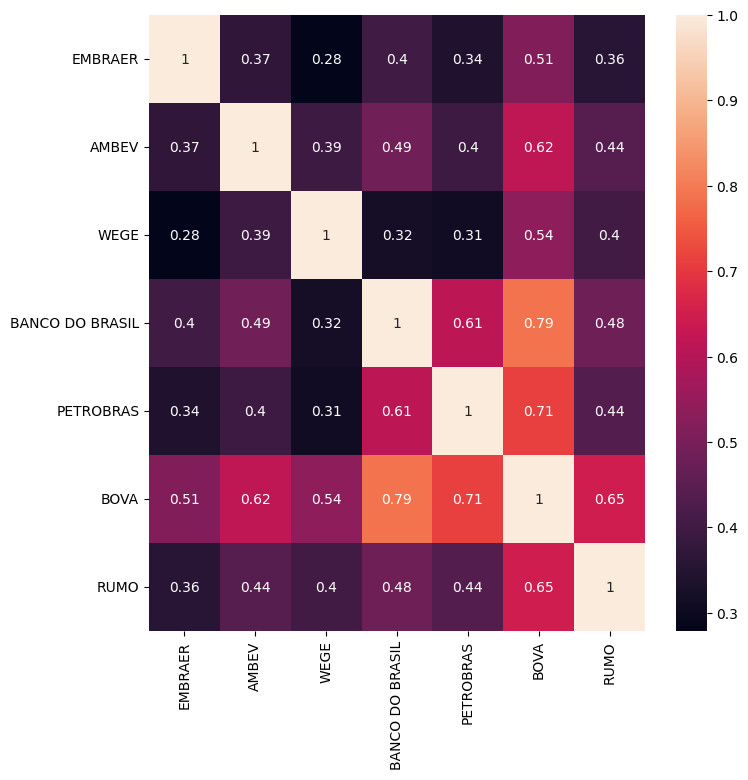

In [168]:
plt.figure(figsize=(8,8))
sns.heatmap(x_br_stocks_return.corr(), annot=True);

In [169]:
x_br_stocks_return.std() * math.sqrt(246)

,0
EMBRAER,0.490083
AMBEV,0.387791
WEGE,0.369610
BANCO DO BRASIL,0.391289
PETROBRAS,0.468431
BOVA,0.259898
RUMO,0.381121


In [170]:
x_br_stocks_porcentage = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0])

In [171]:
x_br_stocks_variance = np.dot(x_br_stocks_porcentage, np.dot(x_br_stocks_return.cov() * 246, x_br_stocks_porcentage))
x_br_stocks_variance

0.14525329457021405

In [172]:
x_br_stocks_variance = math.sqrt(np.dot(x_br_stocks_porcentage, np.dot(x_br_stocks_return.cov() * 246, x_br_stocks_porcentage)))
x_br_stocks_variance

0.38112110223682716

In [173]:
x_br_stocks_return_variance = (x_br_stocks_return.var() * 246) * x_br_stocks_porcentage
sub = x_br_stocks_return_variance[0] - x_br_stocks_return_variance[1] - x_br_stocks_return_variance[2] - x_br_stocks_return_variance[3] - x_br_stocks_return_variance[4] - x_br_stocks_return_variance[5] - x_br_stocks_return_variance[6]
x_stocks_system_risk = (x_br_stocks_variance - sub)
x_stocks_system_risk

<ipython-input-173-2e17b38922f2>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.5263743968070416

## Part 04 - Monte Carlo simulation.

In [174]:
br_stocks = pd.read_csv('br_stocks.csv')

In [175]:
def monte_carlo(br_stocks, active, future_days, simulation):
  br_stocks = br_stocks.copy()
  br_stocks = pd.DataFrame(br_stocks[active])

  br_stocks_formated = br_stocks.copy()
  for i in br_stocks:
    br_stocks_formated[i] = br_stocks[i] / br_stocks[i][0]

  br_stocks_return = np.log(1 + br_stocks_formated.pct_change())
  br_stocks_return.fillna(0, inplace=True)

  median = br_stocks_return.mean()
  variance = br_stocks_return.var()

  drift = median - (0.5 * variance)
  deviation = br_stocks_return.std()
  Z = stats.norm.ppf(np.random.rand(future_days, simulation))
  retornos_diarios = np.exp(drift.values + deviation.values * Z)

  predictions = np.zeros_like(retornos_diarios)
  predictions[0] = br_stocks.iloc[-1]

  for day in range(1, future_days):
    predictions[day] = predictions[day - 1] * retornos_diarios[day]

  figura = px.line(title = 'Previsões do preço das ações - ' + active)
  for i in range(len(predictions.T)):
    figura.add_scatter(y = predictions.T[i], name = i)
  figura.show()

  return predictions.T

In [176]:
predictions = monte_carlo(pd.read_csv('br_stocks.csv'), 'BOVA', 50, 10)

In [177]:
predictions[1]

array([130.38999939, 127.29284342, 127.37235624, 128.99957023,
       126.96332331, 126.39334009, 127.71823481, 124.35046988,
       124.90623619, 124.32940476, 123.33638424, 125.23655762,
       127.74131846, 122.85643077, 122.43637162, 124.41811423,
       123.76293079, 123.04642343, 123.73142174, 124.8484747 ,
       126.00014265, 124.50404315, 124.07050951, 122.16083403,
       120.96092018, 119.80528028, 117.91494294, 117.22609971,
       118.36266614, 119.09733461, 117.84232663, 119.39433872,
       117.79476057, 116.31789696, 115.98777938, 110.09889573,
       107.43470088, 107.38493462, 107.31701214, 107.0592713 ,
       105.76465775, 106.64621384, 106.33722798, 107.80657699,
       109.02665733, 107.70192009, 107.17237053, 107.90166277,
       109.30057418, 106.99094037])

In [180]:
br_stocks = pd.read_csv('br_stocks.csv')
for active in br_stocks.columns[1:]:
  monte_carlo(br_stocks, active, 100, 20)

In [181]:
br_stocks = pd.read_csv('br_stocks.csv')
for active in br_stocks.columns[1:]:
  monte_carlo(br_stocks, active, 30, 100)